- n = [800, 1200, 2000] / 400

- indp = N
- z_dis = gaussian
- noise_dis = t
- dz=2,3,5,10
- alpha=2

In [12]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

2025-02-04 16:42:36.078041: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 16:42:36.105320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738658556.124970     314 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738658556.130884     314 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 16:42:36.150725: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [13]:
n_list = [800, 1200, 2000]
ensembles = [(p_alpha2, 1), (p_alpha2, 400)]
t = 1000
cit = kcit

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [3:07:00<00:00, 11.22s/it] 


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [17:55<00:00,  1.08s/it]


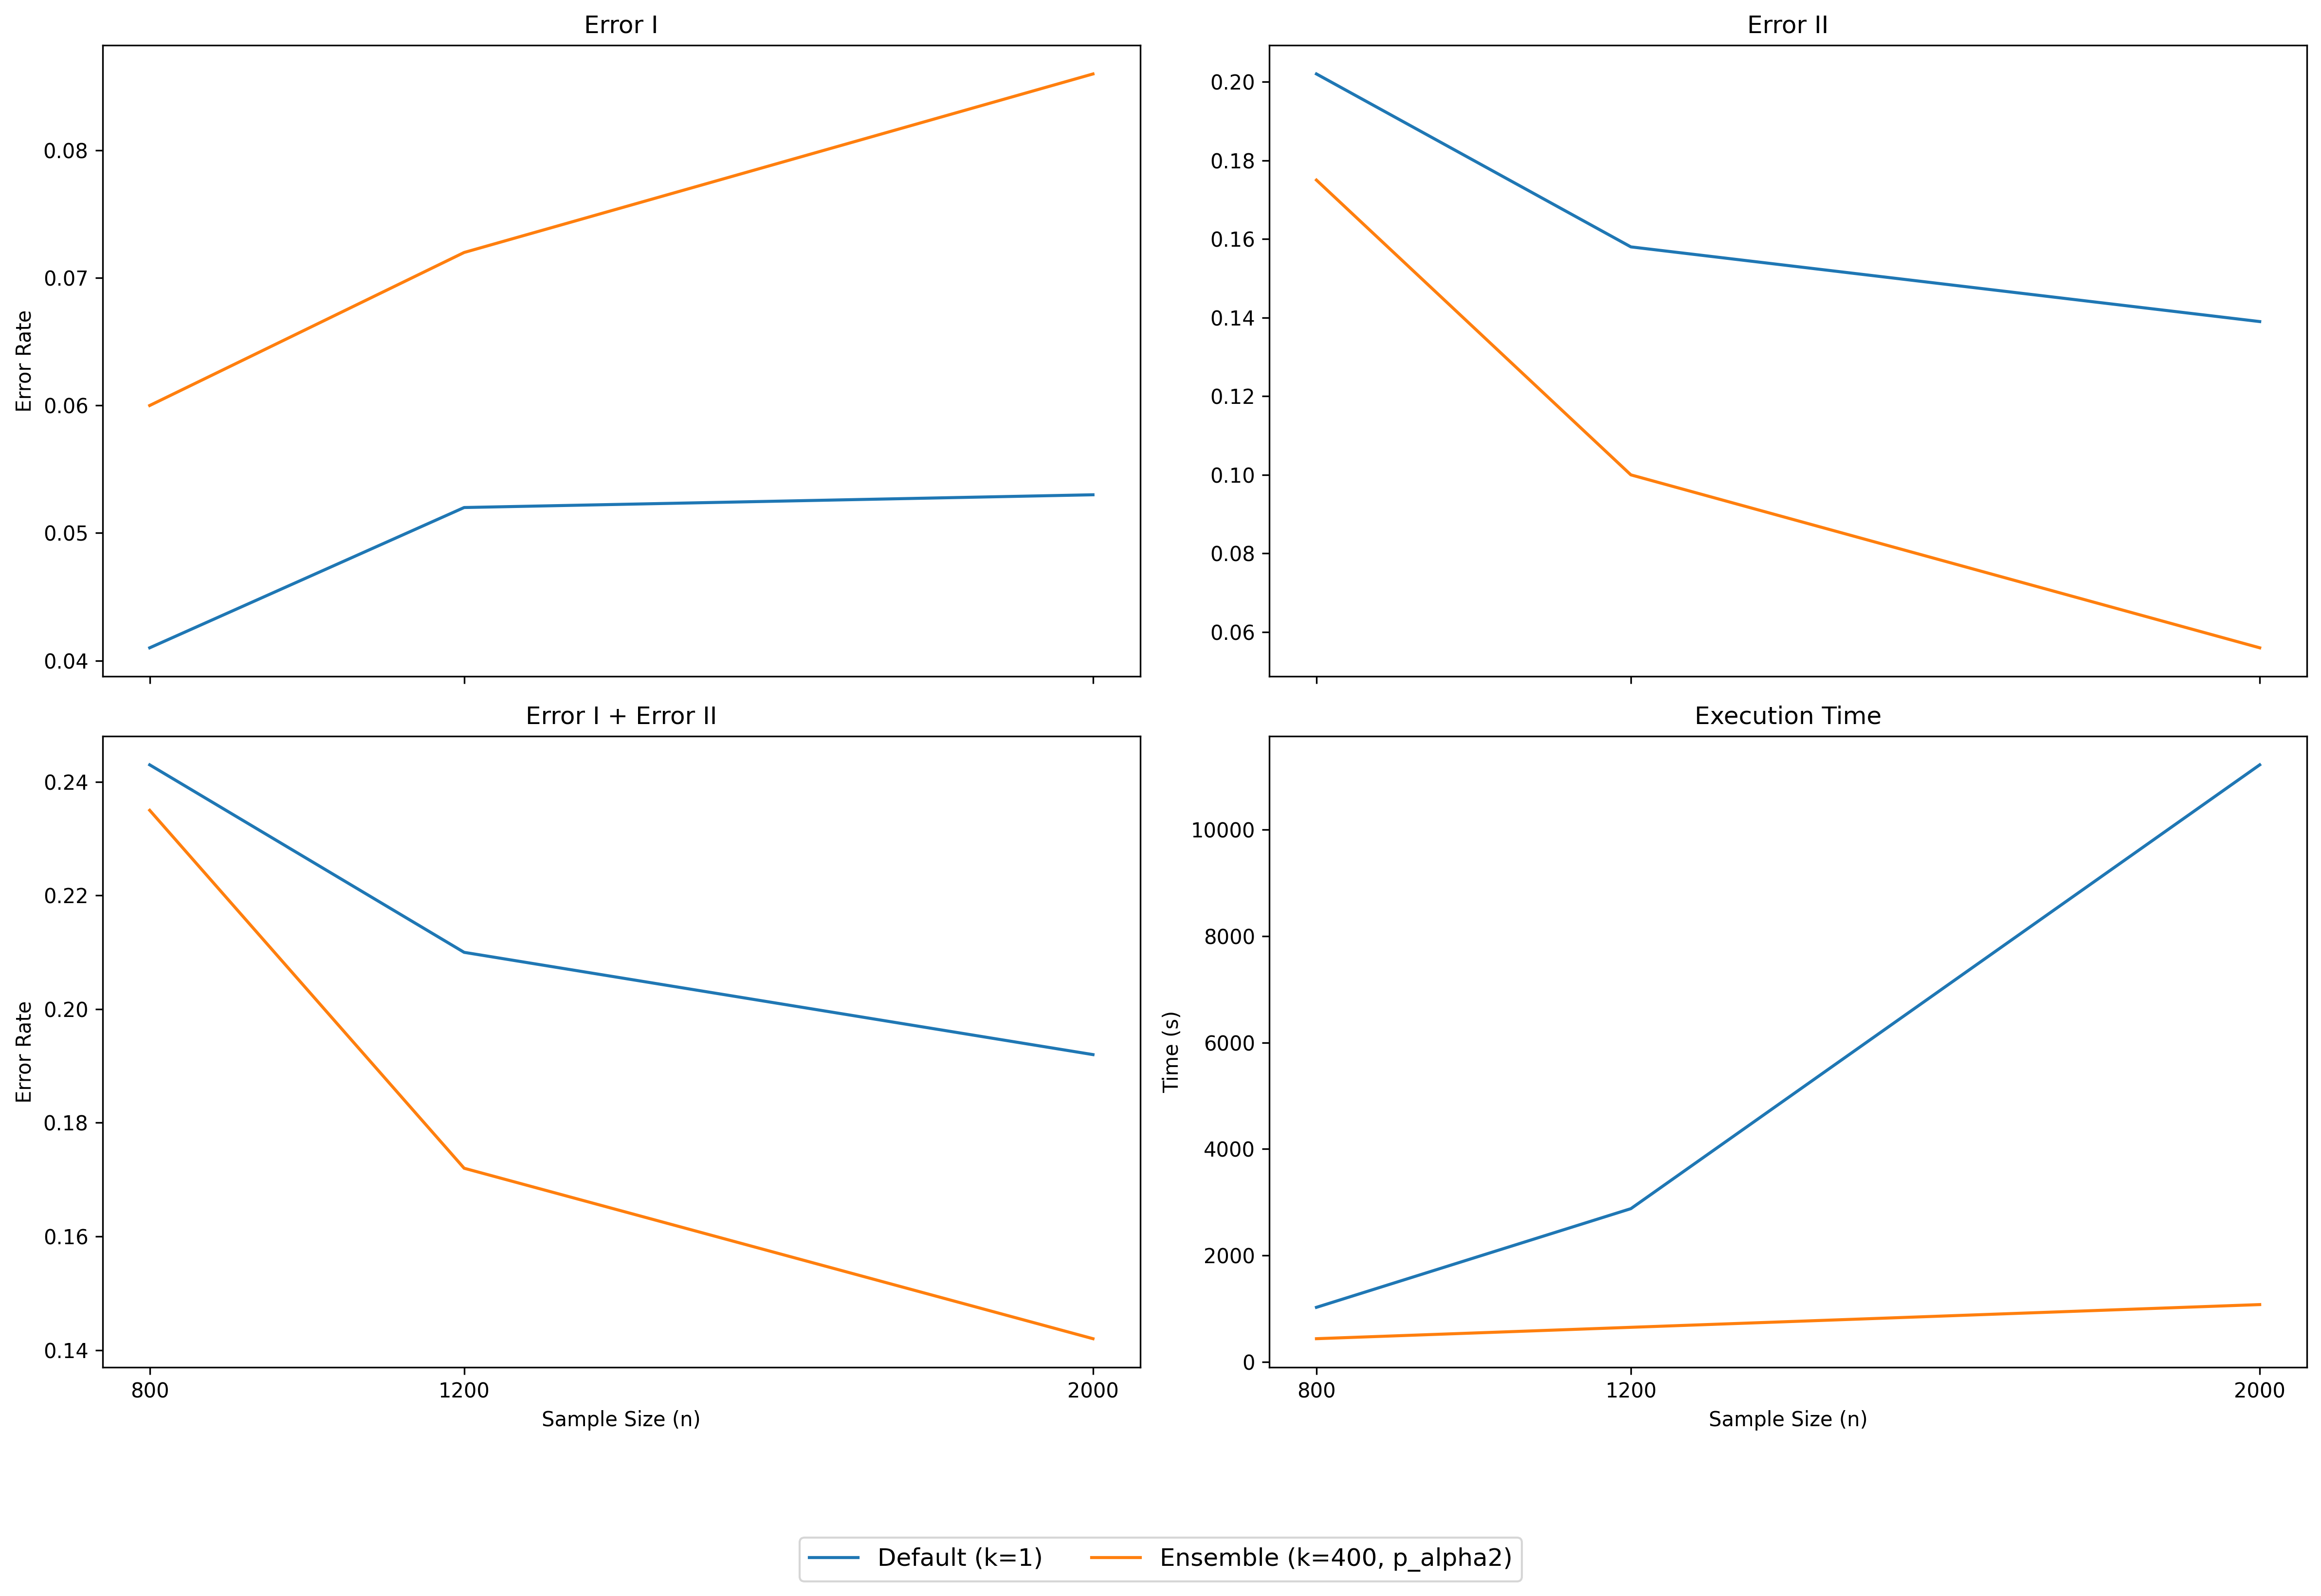

[[[0.041, 0.052, 0.053],
  [0.202, 0.158, 0.139],
  [1023.5576179027557, 2878.2667508125305, 11220.68251490593]],
 [[0.06, 0.072, 0.086],
  [0.175, 0.1, 0.056],
  [434.14172315597534, 648.0323927402496, 1075.277577161789]]]

In [14]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=2,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [3:21:25<00:00, 12.09s/it] 


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:06<00:00,  1.21s/it]


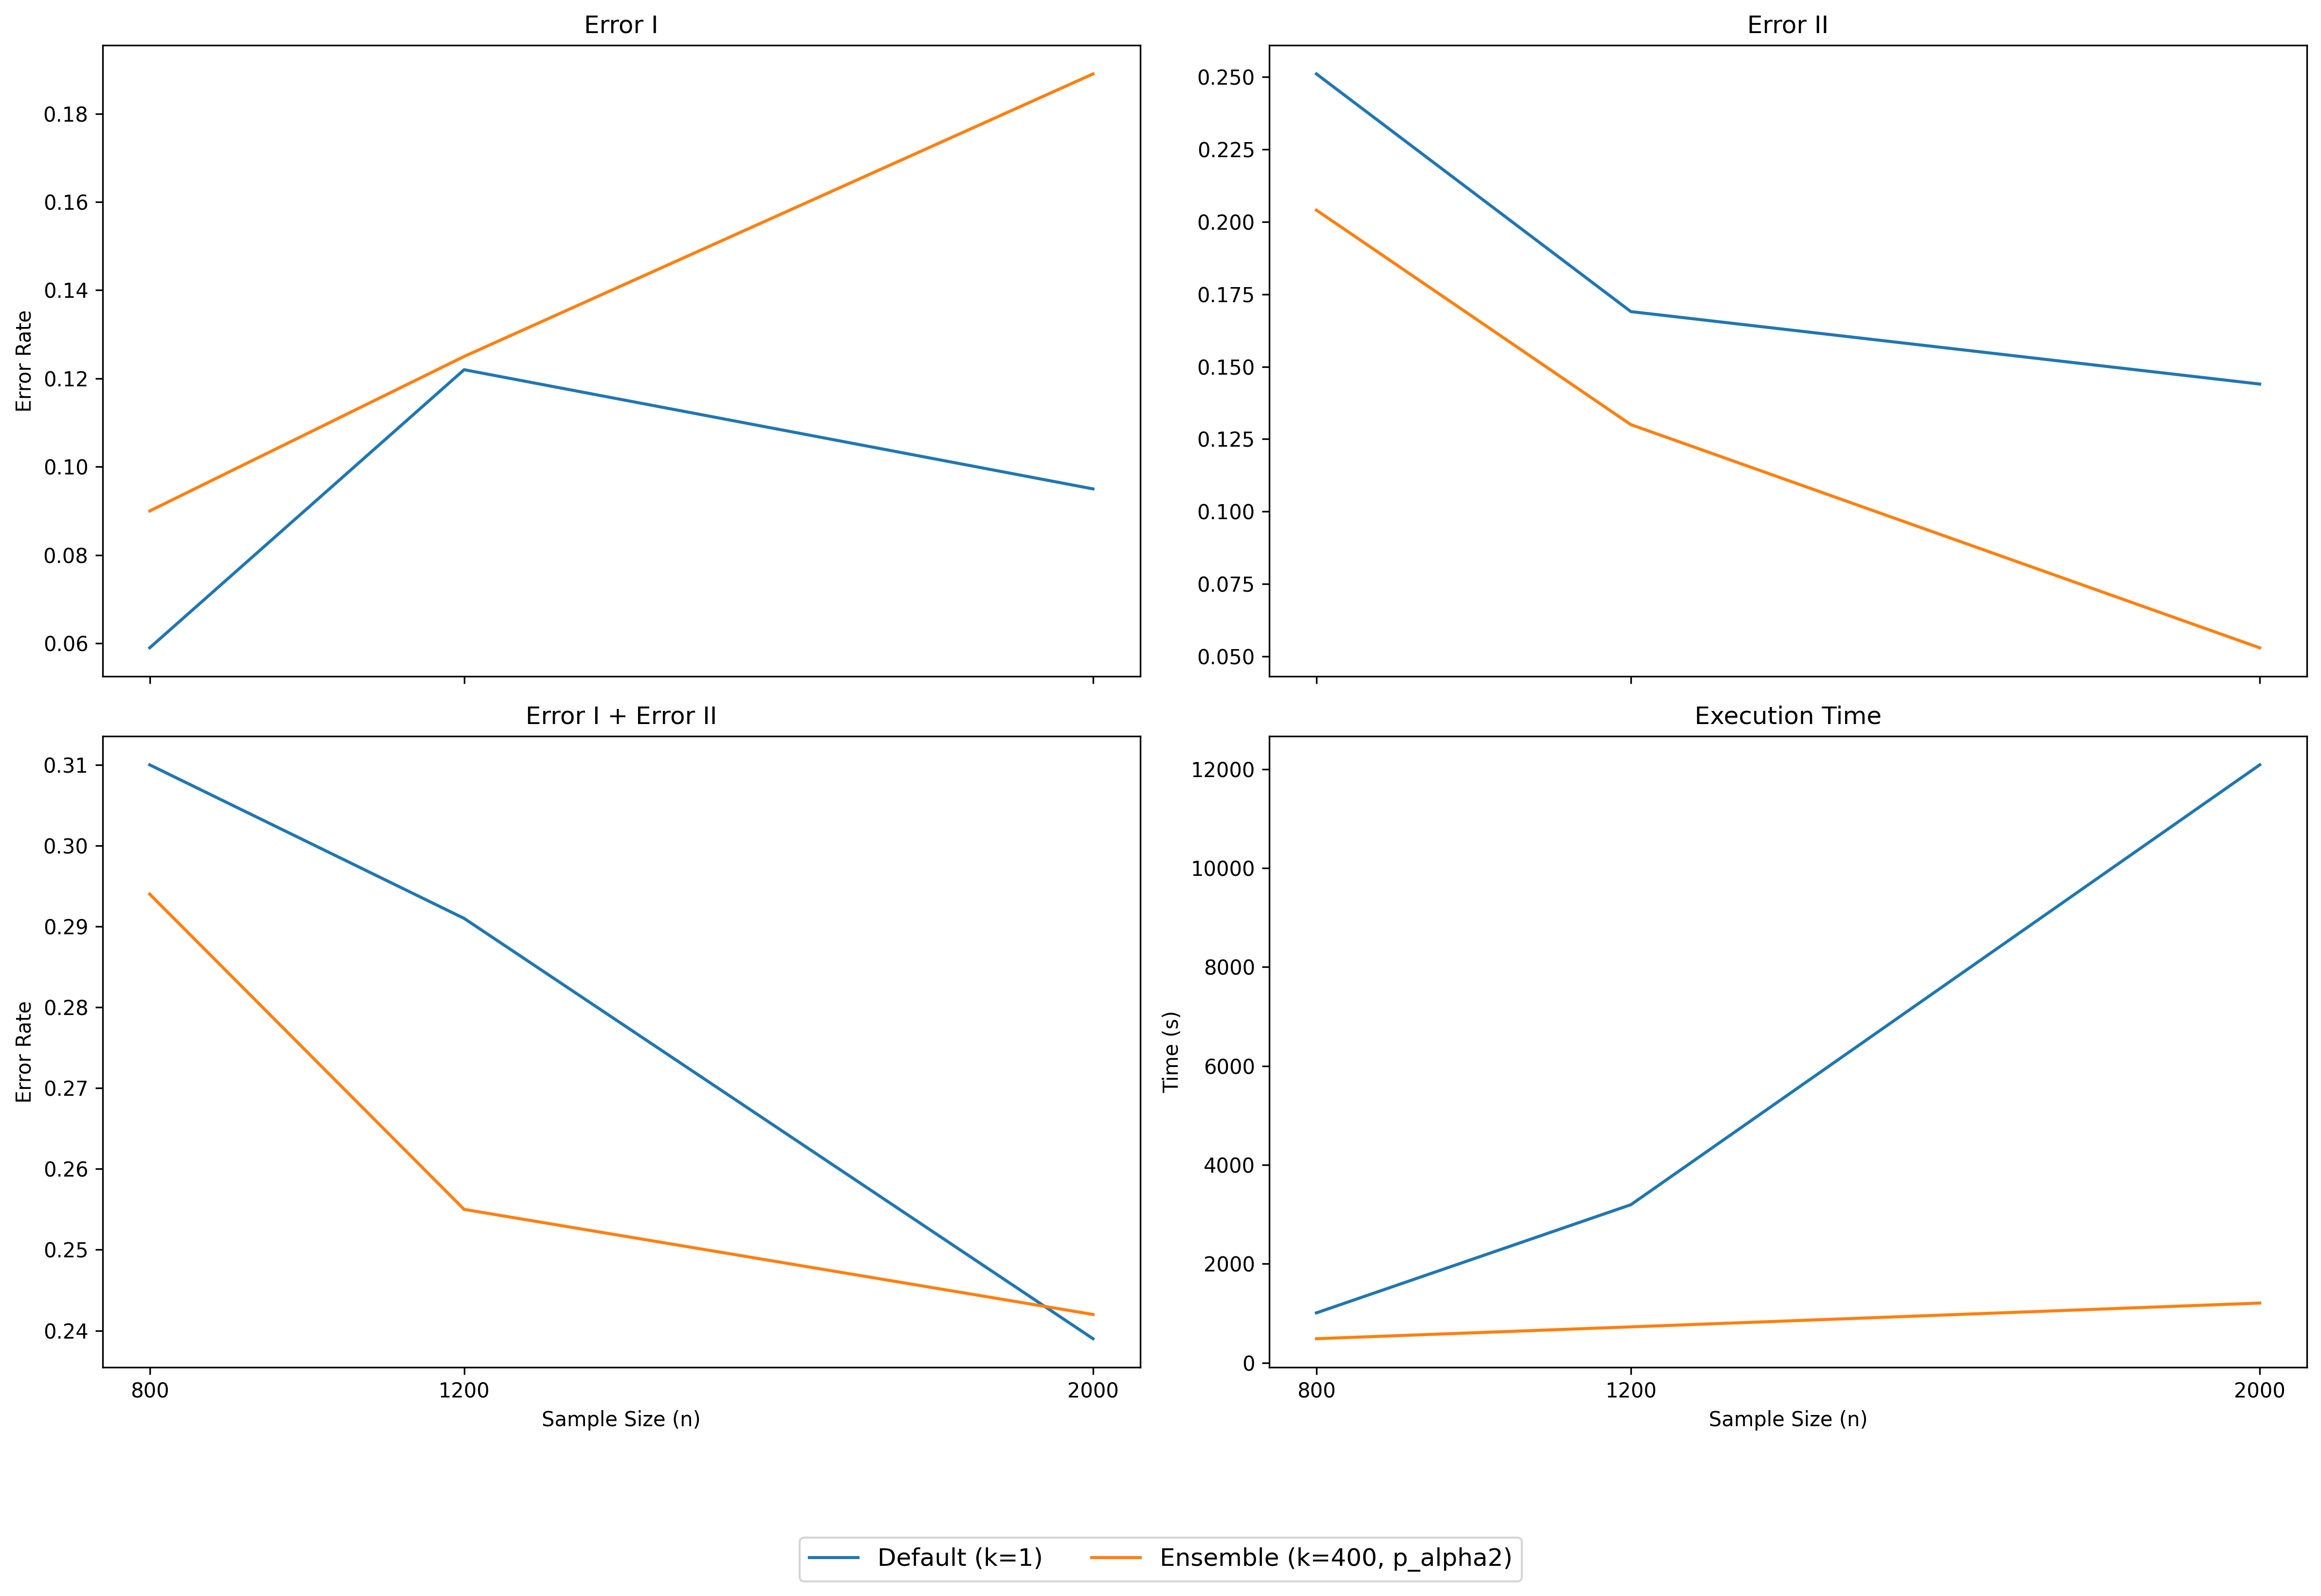

[[[0.059, 0.122, 0.095],
  [0.251, 0.169, 0.144],
  [1007.9520180225372, 3194.0736224651337, 12085.448177337646]],
 [[0.09, 0.125, 0.189],
  [0.204, 0.13, 0.053],
  [486.0482852458954, 725.2153129577637, 1206.1855356693268]]]

In [15]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=3,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [3:26:43<00:00, 12.40s/it] 


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [20:54<00:00,  1.25s/it]


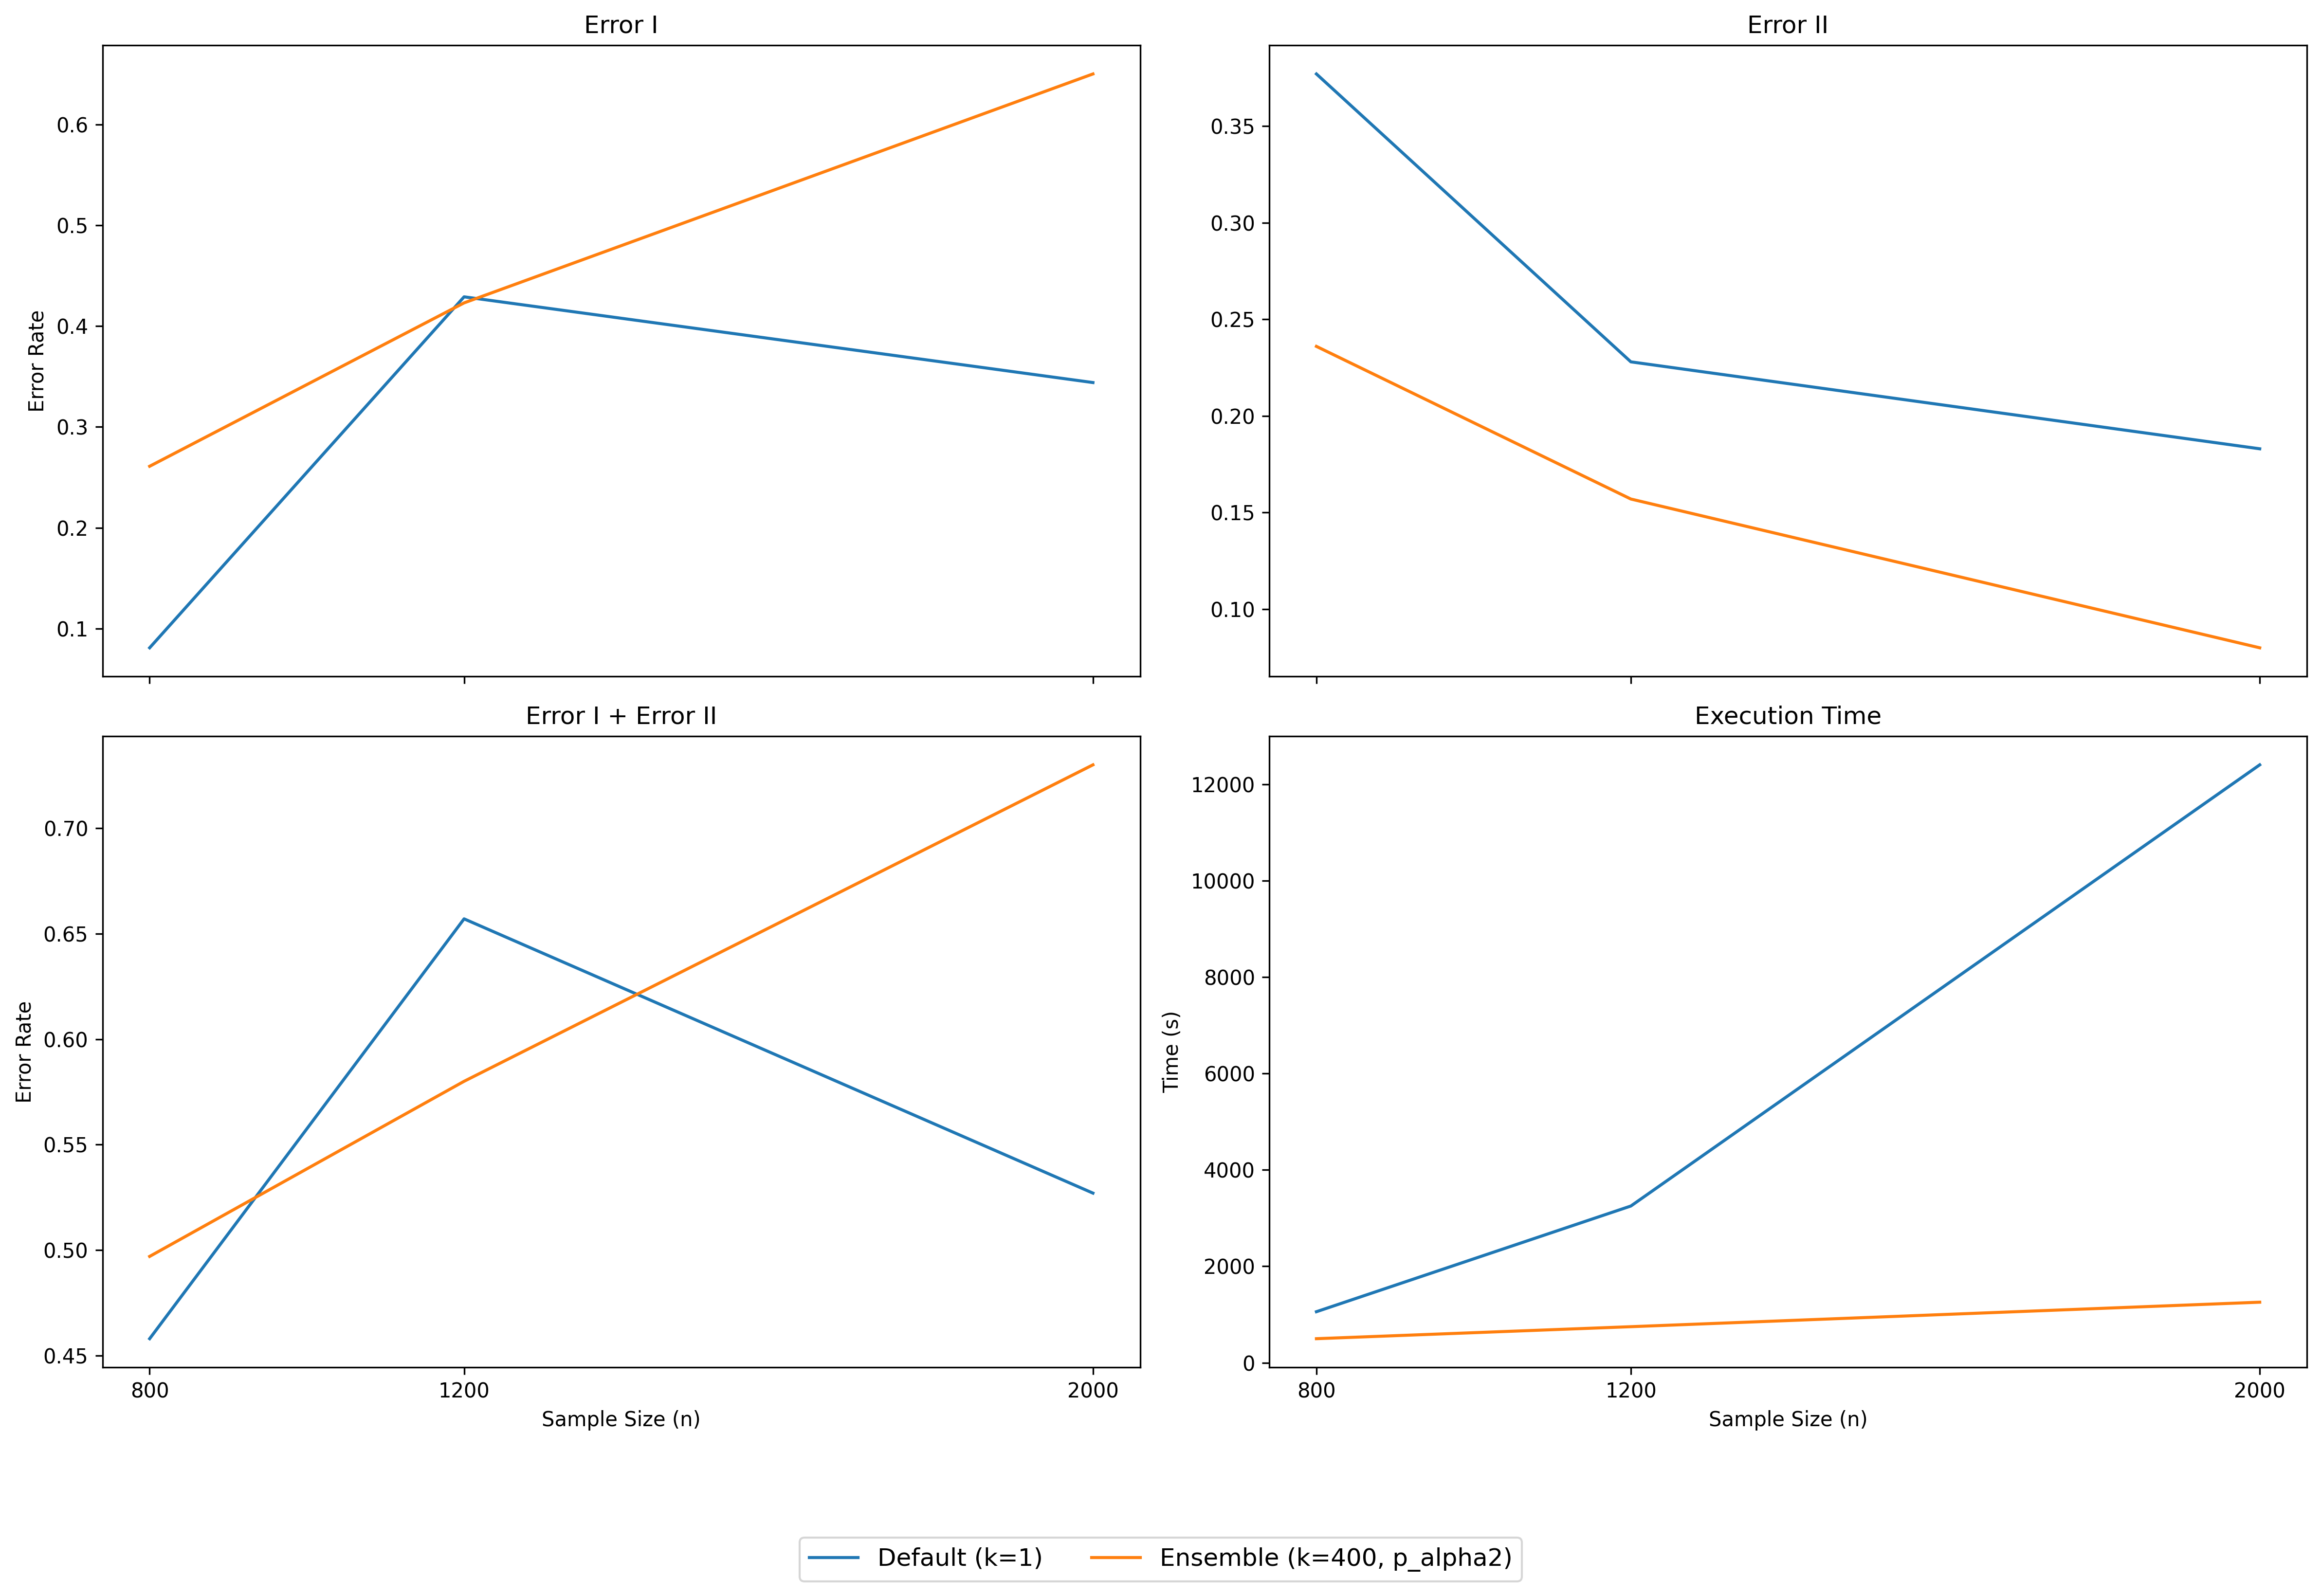

[[[0.081, 0.429, 0.344],
  [0.377, 0.228, 0.183],
  [1057.6705331802368, 3250.219327688217, 12403.688352108002]],
 [[0.261, 0.423, 0.65],
  [0.236, 0.157, 0.08],
  [497.770254611969, 746.8917663097382, 1254.9195413589478]]]

In [16]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=5,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|██████████| 1000/1000 [4:09:17<00:00, 14.96s/it] 


Ensemble (k=400, p_alpha2)


n=2000: 100%|██████████| 1000/1000 [23:01<00:00,  1.38s/it]


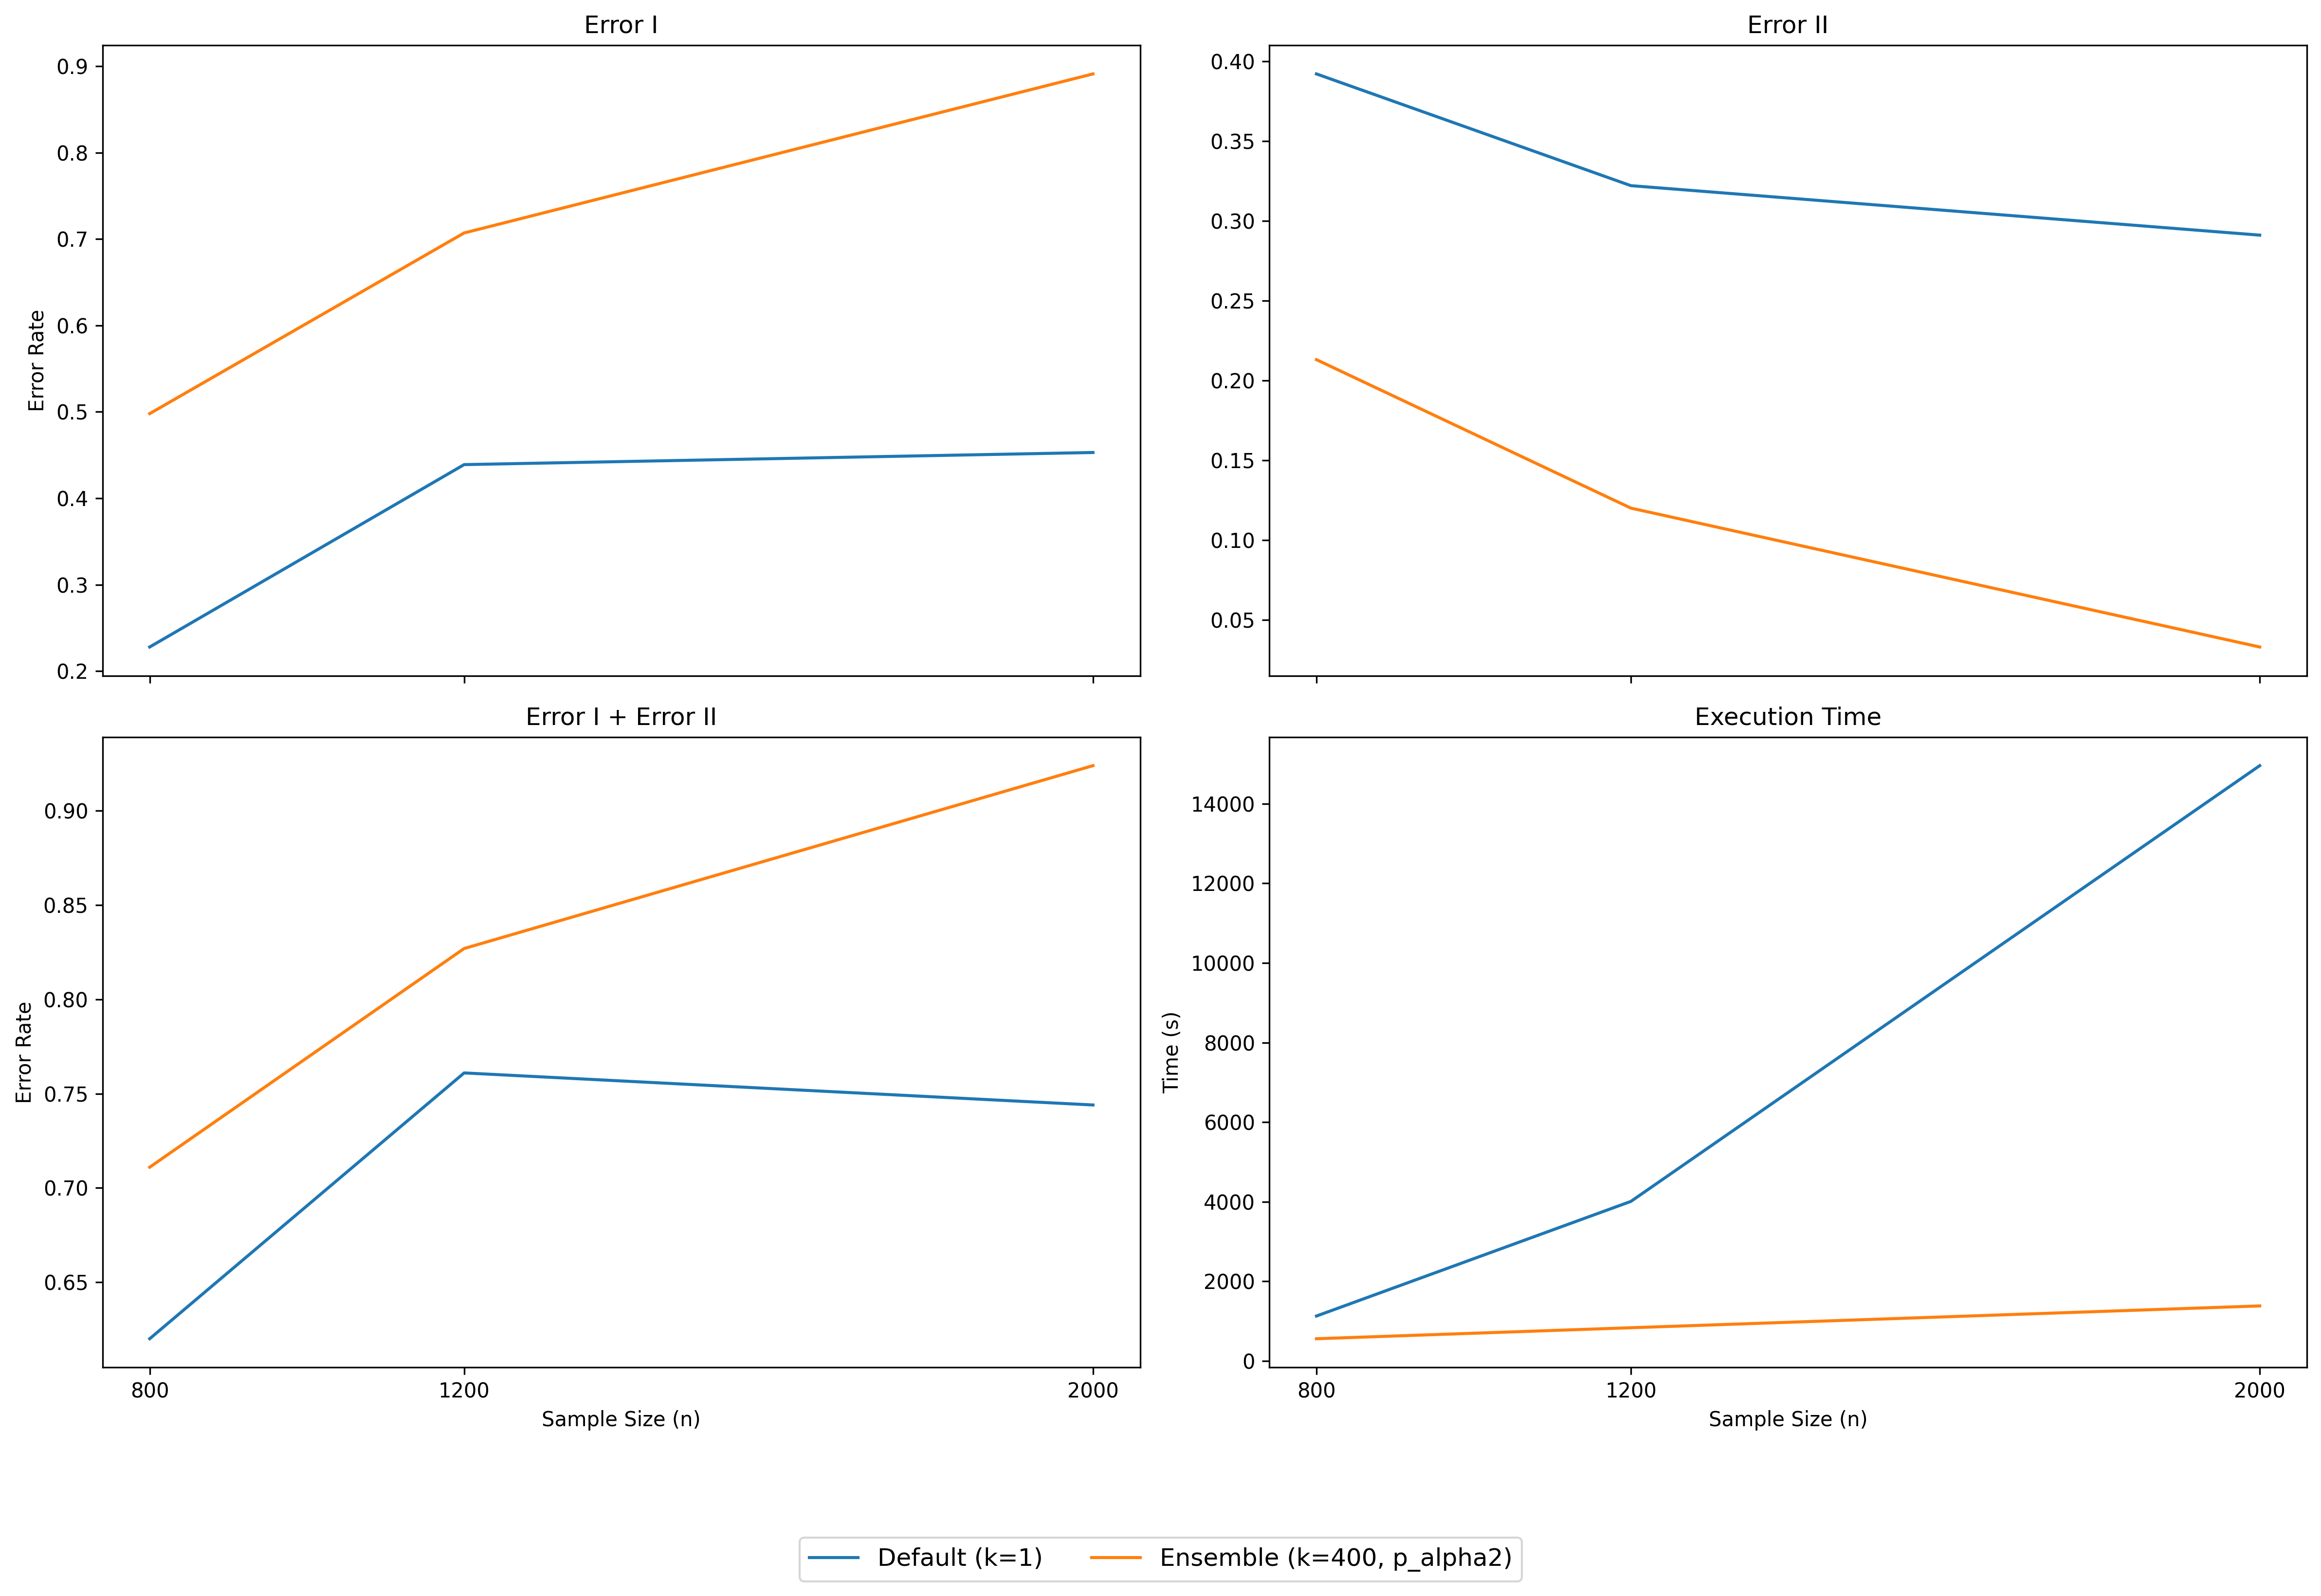

[[[0.228, 0.439, 0.453],
  [0.392, 0.322, 0.291],
  [1127.0564901828766, 4007.473412513733, 14957.91918873787]],
 [[0.498, 0.707, 0.891],
  [0.213, 0.12, 0.033],
  [556.8205034732819, 833.0352787971497, 1381.32958650589]]]

In [17]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=10,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results